In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
FOLDERNAME = 'data'

In [ ]:
import glob

상처 데이터셋 병합

In [ ]:
import os
import zipfile
import pandas as pd

# ZIP 파일이 들어 있는 디렉토리 경로
zip_dir = "/content/drive/MyDrive/data"

# 각 TSV 파일을 저장할 디렉토리 경로
output_dir = "/content/drive/MyDrive/data/merged"

# 디렉토리 생성
os.makedirs(output_dir, exist_ok=True)

# 각 ZIP 파일 내의 TSV 파일들을 읽어서 하나의 데이터프레임으로 합치기
dfs = []
for zip_file in os.listdir(zip_dir):
    if zip_file.endswith('.zip'):
        zip_path = os.path.join(zip_dir, zip_file)
        with zipfile.ZipFile(zip_path, 'r') as z:
            for file_name in z.namelist():
                if file_name.endswith('.tsv'):
                    with z.open(file_name) as tsv_file:
                        # TSV 파일을 데이터프레임으로 읽기
                        df = pd.read_csv(tsv_file, sep='\t', encoding='utf-8')
                        dfs.append(df)

# 모든 데이터프레임을 하나로 합치기
merged_df_pain = pd.concat(dfs, ignore_index=True)

# 합쳐진 데이터프레임을 CSV 파일로 저장
output_file = os.path.join(output_dir, 'merged_data.tsv')
merged_df_pain.to_csv(output_file, sep='\t', index=False)


In [ ]:
len(merged_df_pain)

2632

In [ ]:
text_to = merged_df_pain[merged_df_pain['utterance_type'] == 0]
text_me = merged_df_pain[merged_df_pain['utterance_type'] == 1]

text_to.to_csv(os.path.join(output_dir, 'text_to.tsv'), sep='\t', index=False)
text_me.to_csv(os.path.join(output_dir, 'text_me.tsv'), sep='\t', index=False)

In [ ]:
text_to = text_to[:1274]

text_to

,id,utterance_id,utterance_type,utterance_text,terminate,regDate,updDate
0,BE22030715,1,0,"여보, 나 지난번에 참가한 문예 공모전에서 또 떨어졌어. 이번이 마지막이다 생각하고...",N,2022-10-17 15:37:44,2022-10-17 15:37:44
2,BE22030715,3,0,어릴 때 작가로써의 꿈을 가지게 되면서 쉽지 않을 거라는 건 짐작했거든. 하지만 그...,N,2022-10-17 15:37:44,2022-11-08 15:38:05
4,BE22030715,5,0,당선된 사람들은 유명한 작가들이나 심사위원들이 직접 나서 서평도 써주잖아. 그런데 ...,N,2022-10-17 15:37:44,2022-10-17 15:37:44
6,BE22030715,7,0,그냥 난 어느 순간부터 결과가 과정보다 더 중요하다고 생각하게 됐거든. 문예 공모전...,N,2022-10-17 15:37:44,2022-11-08 15:38:05
8,BE22030715,9,0,하지만 난 결과에 매번 실망만 쌓여가고 이젠 희망이 거의 보이지 않아. 이젠 꿈이 ...,N,2022-10-17 15:37:44,2022-11-08 15:38:05
...,...,...,...,...,...,...,...
2450,BE22021838,9,0,자기는 말을 참 따뜻하게 해. 성적 받고 너무 슬펐는데 그래도 자기 말 들으니까 조...,N,2022-09-27 11:41:37,2022-11-08 14:44:57
2452,BE22021838,11,0,자기가 그렇게 말해주니 안심이 된다. 내가 내 자신을 너무 몰아세웠나 봐. 진심 어...,N,2022-09-27 11:41:37,2022-11-08 14:44:57
2454,BE22021838,13,0,"공감해줘서 고마워, 덕분에 마음이 많이 나아졌어. 오늘 저녁에 보자.",N,2022-09-27 11:41:37,2022-09-27 11:41:37
2456,BE22021840,1,0,우리 강아지 병원에서 한고비 넘겼다고 해서 집으로 데려왔는데. 이제 숨쉬는 소리가 ...,N,2022-09-27 11:49:36,2022-09-27 11:49:36


In [ ]:
text_me

,id,utterance_id,utterance_type,utterance_text,terminate,regDate,updDate
1,BE22030715,2,1,그렇지 않아도 당신이 퇴근하고 매일 밤마다 글 쓰는 모습을 봤어. 당신의 오랜 꿈이...,N,2022-10-17 15:37:44,2022-11-08 15:38:05
3,BE22030715,4,1,나도 당신을 만나기 전에는 오랫동안 그림을 그려왔었잖아. 어릴 적부터 주변에서 칭찬...,N,2022-10-17 15:37:44,2022-11-08 15:38:05
5,BE22030715,6,1,하지만 당신이 못 된 글이라고 해도 그 중에 분명한 차이는 있을 거라고 생각해. 많...,N,2022-10-17 15:37:44,2022-11-08 15:38:05
7,BE22030715,8,1,"나도 책을 정말 좋아하고 많이 읽지만, 당신 글을 볼 때면 다른 세계라는 생각이 들...",N,2022-10-17 15:37:44,2022-11-08 15:38:05
9,BE22030715,10,1,아주 유명한 작가들 중에서는 공모전에 서른 번 이상 떨어진 사람들도 있대. 자기 글...,N,2022-10-17 15:37:44,2022-10-17 15:37:44
...,...,...,...,...,...,...,...
2623,BE22021984,6,1,맞아 자기는 전에 봤던 드라마를 다시 보면서 여기는 그때 이래서 그랬던 거구나 하며...,N,2022-09-27 17:06:31,2022-09-27 17:06:31
2625,BE22021984,8,1,옛 추억이 있는 방송이 사회자가 바뀌고 나중에는 사라지는 날도 오고 자연스러운 거겠...,N,2022-09-27 17:06:31,2022-11-08 14:45:49
2627,BE22021984,10,1,맞아 아쉽지만 지나가는 대로 흘러가는 대로 보내고 슬퍼할 때도 있겠지. 하지만 우리...,N,2022-09-27 17:06:31,2022-09-27 17:06:31
2629,BE22021984,12,1,이게 다 자기를 보며 나도 성장하고 좋은 영향을 많이 받아서 그런 것 같아. 내가 ...,N,2022-09-27 17:06:31,2022-11-08 14:45:49


In [ ]:
pain_text_to = text_to[text_to['utterance_type'] == 0]
pain_text_me = text_me[text_me['utterance_type'] == 1]

pain_text_to.to_csv('text_to', index = False)
pain_text_me.to_csv('text_me', index = False)

In [ ]:
pain_text_to_0 = pain_text_to[pain_text_to['utterance_type'] == 0][['utterance_text']]
pain_text_me_1 = pain_text_me[pain_text_me['utterance_type'] == 1][['utterance_text']]

In [ ]:
merged_text = pd.concat([pain_text_to_0.reset_index(drop = True), pain_text_me_1.reset_index(drop = True)], axis = 1, ignore_index = True)


In [ ]:
df_pain = merged_text
df_pain['sentiment'] = '상처'

In [ ]:
df_pain

,0,1,sentiment
0,"여보, 나 지난번에 참가한 문예 공모전에서 또 떨어졌어. 이번이 마지막이다 생각하고...",그렇지 않아도 당신이 퇴근하고 매일 밤마다 글 쓰는 모습을 봤어. 당신의 오랜 꿈이...,상처
1,어릴 때 작가로써의 꿈을 가지게 되면서 쉽지 않을 거라는 건 짐작했거든. 하지만 그...,나도 당신을 만나기 전에는 오랫동안 그림을 그려왔었잖아. 어릴 적부터 주변에서 칭찬...,상처
2,당선된 사람들은 유명한 작가들이나 심사위원들이 직접 나서 서평도 써주잖아. 그런데 ...,하지만 당신이 못 된 글이라고 해도 그 중에 분명한 차이는 있을 거라고 생각해. 많...,상처
3,그냥 난 어느 순간부터 결과가 과정보다 더 중요하다고 생각하게 됐거든. 문예 공모전...,"나도 책을 정말 좋아하고 많이 읽지만, 당신 글을 볼 때면 다른 세계라는 생각이 들...",상처
4,하지만 난 결과에 매번 실망만 쌓여가고 이젠 희망이 거의 보이지 않아. 이젠 꿈이 ...,아주 유명한 작가들 중에서는 공모전에 서른 번 이상 떨어진 사람들도 있대. 자기 글...,상처
...,...,...,...
1269,자기는 말을 참 따뜻하게 해. 성적 받고 너무 슬펐는데 그래도 자기 말 들으니까 조...,내가 더 감사하고 고마운 부분인걸? 앞으로도 잘 부탁해. 이렇게 별 탈 나지 않게만...,상처
1270,자기가 그렇게 말해주니 안심이 된다. 내가 내 자신을 너무 몰아세웠나 봐. 진심 어...,NaN,상처
1271,"공감해줘서 고마워, 덕분에 마음이 많이 나아졌어. 오늘 저녁에 보자.",NaN,상처
1272,우리 강아지 병원에서 한고비 넘겼다고 해서 집으로 데려왔는데. 이제 숨쉬는 소리가 ...,NaN,상처


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from tqdm.auto import tqdm

In [ ]:
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 4.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.12k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
total_sim_SBERT = []
for fir, sec in tqdm(zip(pain_text_to['utterance_text'], pain_text_me['utterance_text']), total=len(df)):
    try:
        emb1 = model.encode(fir, convert_to_tensor=True)
        emb2 = model.encode(sec, convert_to_tensor=True)
        cosine_scores = util.pytorch_cos_sim(emb1, emb2)
        total_sim_SBERT.append(float(cosine_scores[0][0]))
    except Exception as e:
        total_sim_SBERT.append(0)

  0%|          | 0/14 [00:00<?, ?it/s]

In [ ]:
# total_sim_SBERT 리스트의 길이를 데이터프레임의 행 수와 일치하도록 조정
total_sim_SBERT = total_sim_SBERT + [0] * (len(df_pain) - len(total_sim_SBERT))

# SBert_유사도 열을 데이터프레임에 추가
df_pain['SBert_유사도'] = total_sim_SBERT

# 수정된 데이터프레임 출력
df_pain


df_pain['SBert_유사도'] = total_sim_SBERT
df_pain

,0,1,sentiment,SBert_유사도
0,"여보, 나 지난번에 참가한 문예 공모전에서 또 떨어졌어. 이번이 마지막이다 생각하고...",그렇지 않아도 당신이 퇴근하고 매일 밤마다 글 쓰는 모습을 봤어. 당신의 오랜 꿈이...,상처,0.609679
1,어릴 때 작가로써의 꿈을 가지게 되면서 쉽지 않을 거라는 건 짐작했거든. 하지만 그...,나도 당신을 만나기 전에는 오랫동안 그림을 그려왔었잖아. 어릴 적부터 주변에서 칭찬...,상처,0.732808
2,당선된 사람들은 유명한 작가들이나 심사위원들이 직접 나서 서평도 써주잖아. 그런데 ...,하지만 당신이 못 된 글이라고 해도 그 중에 분명한 차이는 있을 거라고 생각해. 많...,상처,0.600855
3,그냥 난 어느 순간부터 결과가 과정보다 더 중요하다고 생각하게 됐거든. 문예 공모전...,"나도 책을 정말 좋아하고 많이 읽지만, 당신 글을 볼 때면 다른 세계라는 생각이 들...",상처,0.257447
4,하지만 난 결과에 매번 실망만 쌓여가고 이젠 희망이 거의 보이지 않아. 이젠 꿈이 ...,아주 유명한 작가들 중에서는 공모전에 서른 번 이상 떨어진 사람들도 있대. 자기 글...,상처,0.346343
...,...,...,...,...
1269,자기는 말을 참 따뜻하게 해. 성적 받고 너무 슬펐는데 그래도 자기 말 들으니까 조...,내가 더 감사하고 고마운 부분인걸? 앞으로도 잘 부탁해. 이렇게 별 탈 나지 않게만...,상처,0.370639
1270,자기가 그렇게 말해주니 안심이 된다. 내가 내 자신을 너무 몰아세웠나 봐. 진심 어...,NaN,상처,0.000000
1271,"공감해줘서 고마워, 덕분에 마음이 많이 나아졌어. 오늘 저녁에 보자.",NaN,상처,0.000000
1272,우리 강아지 병원에서 한고비 넘겼다고 해서 집으로 데려왔는데. 이제 숨쉬는 소리가 ...,NaN,상처,0.000000


In [ ]:
df_pain.sample(10)

,0,1,sentiment,SBert_유사도
45,"맞아, 나도 일하는 거 재미있어. 다만 그래도 쉬는 날이 조금은 확보된다면 더 좋을...",여보가 혼자서 마음고생이 많았겠군요. 일을 하는 건 꼭 돈을 벌기 위해서가 아니라 ...,상처,0.364638
254,아니에요. 지금 내가 이런 처지인데 지금은 그때로 돌아가고 싶어요. 아무리 힘을 내...,내가 당신이었어도 똑같이 자책하며 스스로를 상처냈을 거예요. 듣기만 했는데도 내가 ...,상처,0.495466
785,"응, 내일 저녁인데 입을 옷도 없고. 그냥 가지 말까 고민 중이야 이 나이에 옷도 ...",나침반이 제자리에서 흔들리는 것처럼 보여도 실은 올바른 길을 찾는 중이잖아요. 여보...,상처,0.309822
171,다른 아주머니 한 분이 본인도 그런 경우가 있었다면서 도움을 주시긴 했어. 하지만 ...,의사 선생님도 그랬잖아. 정말 많은 원인으로 인해서 발생할 수 있다고. 당신 탓이 ...,상처,0.362472
854,어릴 때는 이 주름도 아름다워 보였지만 나이가 들고 나니 하회탈 같아서 이제 없애고...,그랬구나. 당신 요즘 먹는 양이 예전보다 많이 줄어든 것 같아.,상처,0.242101
1054,"그동안 나를 먼저 챙긴다는 게, 미안함이 먼저 들었던 게 사실이야. 그렇게 살아와서...",정말 서운하고 기분이 우울하겠다 그 정도면. 그래도 아닐 거야 원래 사이도 되게 좋...,상처,0.486075
486,하루하루 몸과 마음이 같이 피폐해지는 기분이 들어. 젓가락질까지 지적하는 모습에 충...,당신이 이렇게 나에게 이야기해 주는 게 난 더 고마운걸. 이렇게 대화하면 모든 게 ...,상처,0.283107
328,그냥 잊어보려고 해도 문득 문득 생각나요. 사교적인 친구였는데 내가 왜 싫어진 걸까...,그렇게 말해주니 내가 고마워요. 당신에게 진 빚을 어떻게 갚아야 할지 모르겠어요. ...,상처,0.294409
420,그렇구나. 내가 왜 거기까지는 생각을 못 했을까. 아빠로서 너무 부끄럽다. 나를 위...,자기는 뱃멀미 중이라 피곤했을 텐데 상처주는 말들을 들어서 화나고 속상할 것 같아....,상처,0.396600
1032,"자기야, 나 요즘 너무 슬퍼. 요즘 원고 마감이라 업무 강도를 높였더니, 생각하는 ...",충분히 그럴 수 있을 것 같아. 네가 SNS를 많이 신경 쓰고 그 안에서 만나는 사...,상처,0.174239


데이터셋 유사도 분포

<Axes: xlabel='SBert_유사도', ylabel='Count'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLAB

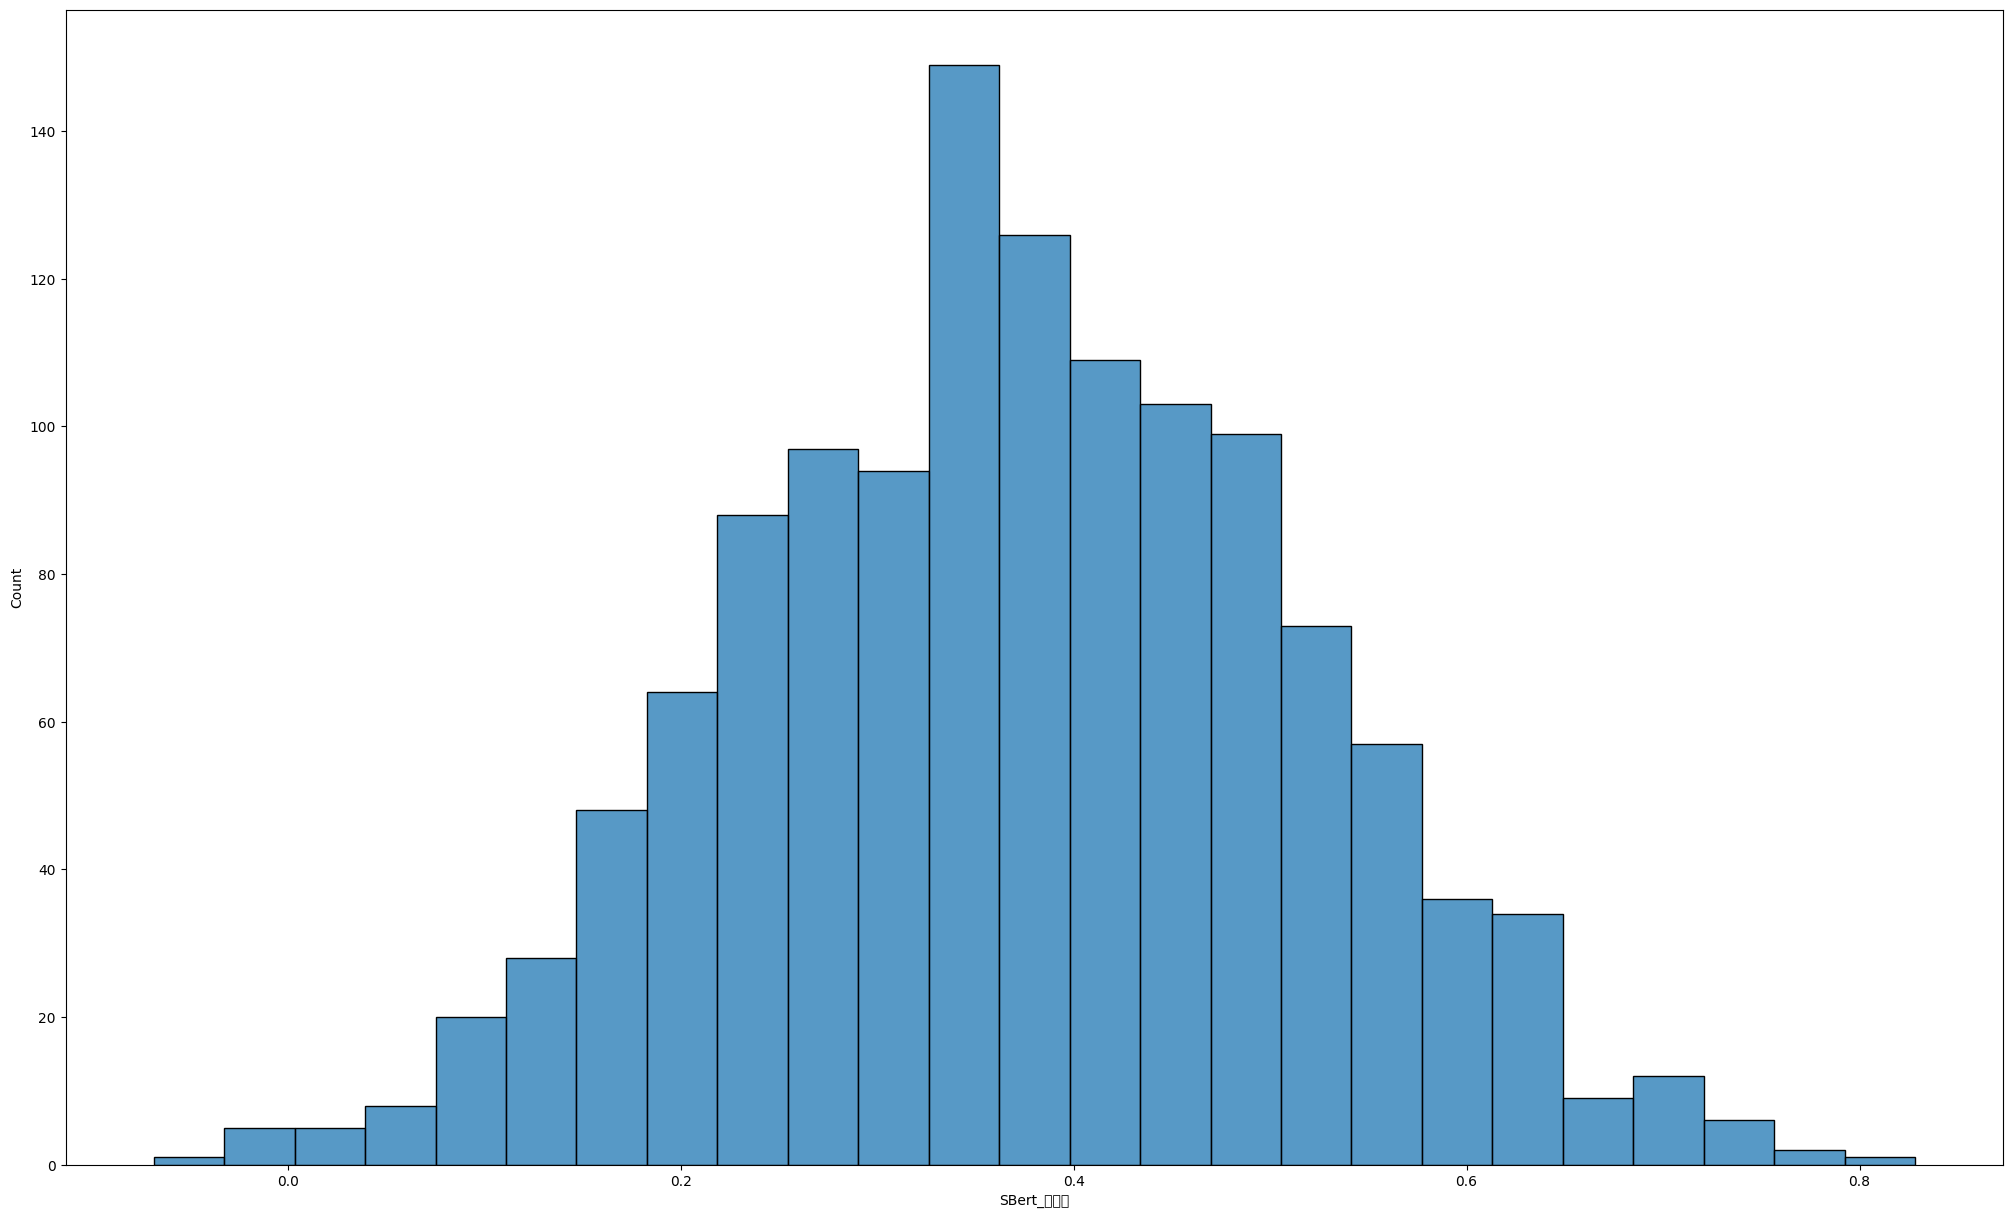

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from tqdm.auto import tqdm


fig, ax = plt.subplots(1, 1, figsize=(25, 15))
sns.histplot(x ='SBert_유사도', data= df_pain, ax=ax)

In [ ]:
df_pain['SBert_유사도'].describe()

count    1274.000000
mean        0.373972
std         0.141888
min        -0.068217
25%         0.271708
50%         0.372066
75%         0.473699
max         0.828265
Name: SBert_유사도, dtype: float64

In [ ]:
df_pain.to_csv('/content/drive/MyDrive/data/상처_데이터.csv', index = False)


슬픔 데이터셋 병합

In [ ]:
import os
import zipfile
import pandas as pd

# 각 압축 폴더가 들어 있는 디렉토리 경로
zip_dir = "/content/drive/MyDrive/data/슬픔"

# 빈 리스트를 생성하여 파일들을 저장할 준비
dfs = []

# 각 압축 폴더 안의 파일들을 읽어들여서 리스트에 추가
for zip_file in os.listdir(zip_dir):
    if zip_file.endswith('.zip'):
        # 압축 폴더 내의 TSV 파일들을 읽어들이기
        with zipfile.ZipFile(os.path.join(zip_dir, zip_file), 'r') as z:
            for file_name in z.namelist():
                if file_name.endswith('.tsv'):
                    # TSV 파일을 데이터프레임으로 읽어서 리스트에 추가
                    with z.open(file_name) as tsv_file:
                        df = pd.read_csv(tsv_file, sep='\t', encoding='utf-8')
                        dfs.append(df)

# 데이터프레임들을 하나로 합치기
merged_df_sadness = pd.concat(dfs, ignore_index=True)

# 합쳐진 데이터프레임을 CSV 파일로 저장
merged_df_sadness.to_csv('merged_data.tsv', sep='\t', index=False)


In [ ]:
len(merged_df_sadness)

1335

In [ ]:
text_to = merged_df_sadness[merged_df_sadness['utterance_type'] == 0]
text_me = merged_df_sadness[merged_df_sadness['utterance_type'] == 1]

text_to.to_csv('text_to', index = False)
text_me.to_csv('text_me', index = False)

In [ ]:
text_to = text_to[:706]

In [ ]:
text_me

,id,utterance_id,utterance_type,utterance_text,terminate,regDate,updDate
1,BE22019734,2,1,당신 무슨 일 있어? 안 그래도 요즘 기운이 좀 없어 보여서 물어보려고 했거든.,N,2022-09-22 14:50:24,2022-09-22 14:50:24
3,BE22019734,4,1,그랬구나. 아이들이 태어나고 한동안 보살피느라 정신없이 지냈잖아. 당신 기분이 어떤...,N,2022-09-22 14:50:24,2022-11-08 14:35:15
5,BE22019734,6,1,나도 말은 하지 않았지만 그 기분 잘 알아. 당신이 우리 가족을 위해 많이 희생하고...,N,2022-09-22 14:50:24,2022-11-08 14:35:15
7,BE22019734,8,1,그건 정말 아니야. 누구보다도 내가 당신을 가장 많이 생각하는 사람인 걸 알잖아.,N,2022-09-22 14:50:24,2022-11-08 14:35:15
9,BE22019734,10,1,맞아. 하지만 난 내가 해야하는 모든 일들이 당신과 나를 위해서 하는 노력이라고 생...,N,2022-09-22 14:50:24,2022-11-08 14:35:15
...,...,...,...,...,...,...,...
1326,BE22021984,6,1,맞아 자기는 전에 봤던 드라마를 다시 보면서 여기는 그때 이래서 그랬던 거구나 하며...,N,2022-09-27 17:06:31,2022-09-27 17:06:31
1328,BE22021984,8,1,옛 추억이 있는 방송이 사회자가 바뀌고 나중에는 사라지는 날도 오고 자연스러운 거겠...,N,2022-09-27 17:06:31,2022-11-08 14:45:49
1330,BE22021984,10,1,맞아 아쉽지만 지나가는 대로 흘러가는 대로 보내고 슬퍼할 때도 있겠지. 하지만 우리...,N,2022-09-27 17:06:31,2022-09-27 17:06:31
1332,BE22021984,12,1,이게 다 자기를 보며 나도 성장하고 좋은 영향을 많이 받아서 그런 것 같아. 내가 ...,N,2022-09-27 17:06:31,2022-11-08 14:45:49


In [ ]:
sadness_text_to = text_to[text_to['utterance_type'] == 0][['utterance_text']]
sadness_text_me = text_me[text_me['utterance_type'] == 1][['utterance_text']]

sadness_text_to.to_csv('text_to', index = False)
sadness_text_me.to_csv('text_me', index = False)

In [ ]:
total_sim_SBERT = []
for fir, sec in tqdm(zip(sadness_text_to['utterance_text'], sadness_text_me['utterance_text']), total=len(df)):
    try:
        emb1 = model.encode(fir, convert_to_tensor=True)
        emb2 = model.encode(sec, convert_to_tensor=True)
        cosine_scores = util.pytorch_cos_sim(emb1, emb2)
        total_sim_SBERT.append(float(cosine_scores[0][0]))
    except Exception as e:
        total_sim_SBERT.append(0)

  0%|          | 0/14 [00:00<?, ?it/s]

In [ ]:
df_sadness = pd.concat([sadness_text_to.reset_index(drop = True), sadness_text_me.reset_index(drop = True)], axis = 1, ignore_index = True)


In [ ]:
# total_sim_SBERT의 길이를 df_sadness와 일치하도록 확장
while len(total_sim_SBERT) < len(df_sadness):
    total_sim_SBERT.append(np.nan)

# SBert_유사도 열에 값 할당
df_sadness['SBert_유사도'] = total_sim_SBERT

df_sadness

,0,1,SBert_유사도
0,"여보, 우리 아이들이 어느새 이렇게 많이 컸네. 문득 사진들을 보다가 당신 생각이 ...",당신 무슨 일 있어? 안 그래도 요즘 기운이 좀 없어 보여서 물어보려고 했거든.,0.438854
1,"그냥 뭐랄까, 아이들이 커 가는 게 당연히 기쁘고 뿌듯하지만 조금 쓸쓸하고 슬픈 느...",그랬구나. 아이들이 태어나고 한동안 보살피느라 정신없이 지냈잖아. 당신 기분이 어떤...,0.628191
2,처음에는 내가 외로움을 많이 타서 그런 거라고 생각했어. 하지만 점점 무얼 위해 사...,나도 말은 하지 않았지만 그 기분 잘 알아. 당신이 우리 가족을 위해 많이 희생하고...,0.460658
3,무엇보다도 난 당신에게 사랑받고 있지 못하다는 기분이 들었어.,그건 정말 아니야. 누구보다도 내가 당신을 가장 많이 생각하는 사람인 걸 알잖아.,0.452240
4,맞아. 알면서도 그냥 문득 한 번씩 그런 기분이 들었어. 당신은 아이들을 챙기는 일...,맞아. 하지만 난 내가 해야하는 모든 일들이 당신과 나를 위해서 하는 노력이라고 생...,0.570408
...,...,...,...
687,그때를 또 추억하며 재방송을 보면 확실히 그때 못 봤던 장면들도 보이더라. 그 나름...,NaN,NaN
688,나중에 분명히 또 보기는 할 거야. 그러다가 전 사회자님을 보면 더 슬퍼질 것 같기...,NaN,NaN
689,자기 말이 맞는 것 같네. 언제까지나 평생 방송을 할 수는 없는 거잖아. 나중에 추...,NaN,NaN
690,이렇게 보면 자기는 참 어른스러워. 항상 보고 배우는 점도 많고 세심한 부분 신경 ...,NaN,NaN


In [ ]:
df_sadness['SBert_유사도'].describe()

count    643.000000
mean       0.369691
std        0.150150
min       -0.117002
25%        0.267833
50%        0.371956
75%        0.470391
max        0.828841
Name: SBert_유사도, dtype: float64

In [ ]:
df_sadness['sentiment'] = '슬픔'

In [ ]:
df_sadness

,0,1,SBert_유사도,sentiment
0,"여보, 우리 아이들이 어느새 이렇게 많이 컸네. 문득 사진들을 보다가 당신 생각이 ...",당신 무슨 일 있어? 안 그래도 요즘 기운이 좀 없어 보여서 물어보려고 했거든.,0.438854,슬픔
1,"그냥 뭐랄까, 아이들이 커 가는 게 당연히 기쁘고 뿌듯하지만 조금 쓸쓸하고 슬픈 느...",그랬구나. 아이들이 태어나고 한동안 보살피느라 정신없이 지냈잖아. 당신 기분이 어떤...,0.628191,슬픔
2,처음에는 내가 외로움을 많이 타서 그런 거라고 생각했어. 하지만 점점 무얼 위해 사...,나도 말은 하지 않았지만 그 기분 잘 알아. 당신이 우리 가족을 위해 많이 희생하고...,0.460658,슬픔
3,무엇보다도 난 당신에게 사랑받고 있지 못하다는 기분이 들었어.,그건 정말 아니야. 누구보다도 내가 당신을 가장 많이 생각하는 사람인 걸 알잖아.,0.452240,슬픔
4,맞아. 알면서도 그냥 문득 한 번씩 그런 기분이 들었어. 당신은 아이들을 챙기는 일...,맞아. 하지만 난 내가 해야하는 모든 일들이 당신과 나를 위해서 하는 노력이라고 생...,0.570408,슬픔
...,...,...,...,...
687,그때를 또 추억하며 재방송을 보면 확실히 그때 못 봤던 장면들도 보이더라. 그 나름...,NaN,NaN,슬픔
688,나중에 분명히 또 보기는 할 거야. 그러다가 전 사회자님을 보면 더 슬퍼질 것 같기...,NaN,NaN,슬픔
689,자기 말이 맞는 것 같네. 언제까지나 평생 방송을 할 수는 없는 거잖아. 나중에 추...,NaN,NaN,슬픔
690,이렇게 보면 자기는 참 어른스러워. 항상 보고 배우는 점도 많고 세심한 부분 신경 ...,NaN,NaN,슬픔


In [ ]:
df_sadness[700:]

,0,1,SBert_유사도,sentiment


In [ ]:
df_sadness.to_csv('/content/drive/MyDrive/data/슬픔_데이터.csv')